 # <center>Metody Obliczeniowe w Nauce i Technice
# <center>Laboratorium 9
# <center>Zastosowania DFT
### Filip Ślazyk
### Nr albumu: 296697
### Grupa laboratoryjna: środa 17:50

In [150]:
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import imageio
from PIL import Image
import PIL.ImageOps    

In [151]:
def show_2D_array_as_image(img_arr, cmap='gray', norm=''):
    dpi = 80.0 # used to print image with its original size
    xpixels, ypixels = len(img_arr), len(img_arr[0])
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1])
    if norm != '':
        ax.imshow(img_arr, cmap=cmap, interpolation='none', norm=norm)
    else:
        ax.imshow(img_arr, cmap=cmap, interpolation='none')
    plt.show()

# 1. Analiza obrazów

# Obraz zawierający tekst

## Wczytanie obrazu i odwrócenie kolorów

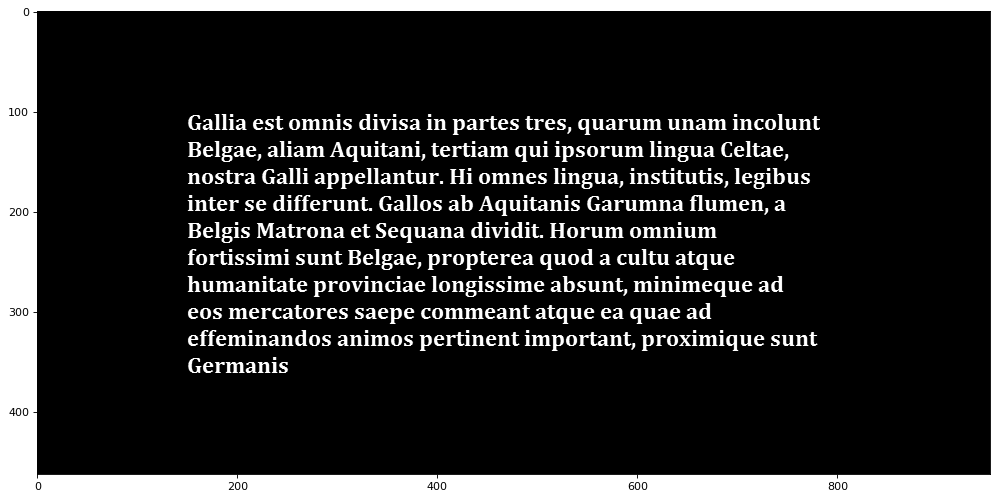

In [152]:
image = Image.open('galia.png').convert('L')
inv_img = PIL.ImageOps.invert(image)
# inv_img = image

img_arr = np.array(inv_img)
show_2D_array_as_image(img_arr)

## Transformacja do domeny częstotliwościowej

In [153]:
freq = np.fft.fft2(img_arr)

## Wykres modułów współczynników Fouriera

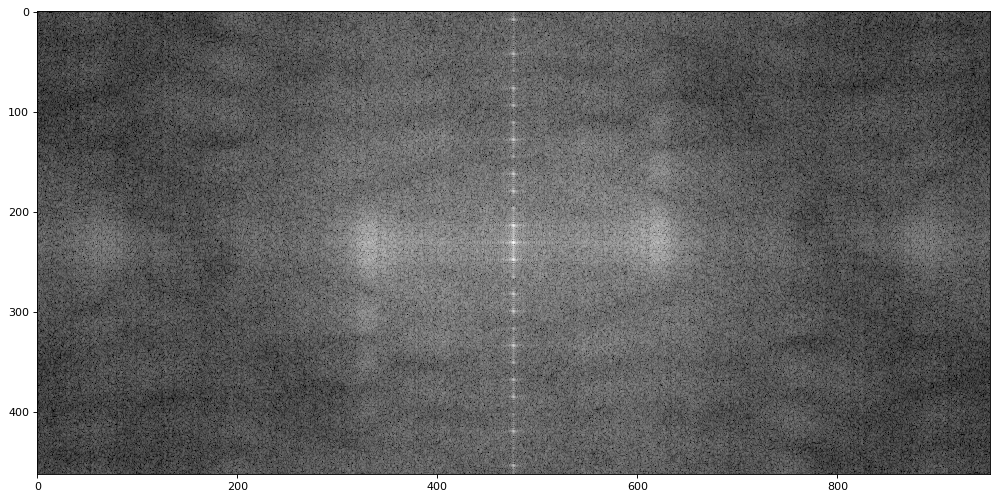

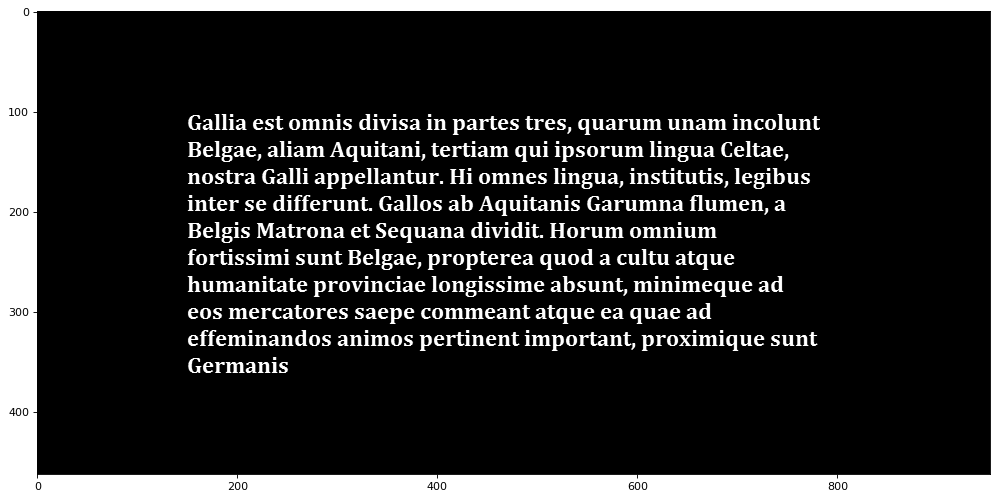

In [154]:
freq = np.fft.fft2(img_arr)
freq = np.fft.fftshift(freq)

modules = np.absolute(freq)

modules = 255 * modules / np.amax(modules)

show_2D_array_as_image(modules, norm=cl.SymLogNorm(linthresh=0.01, linscale=0.01, 
                                                                               vmin=modules.min(), vmax=modules.max()))

img_arr2 = np.real(np.fft.ifft2(np.fft.ifftshift(freq)))
show_2D_array_as_image(img_arr2)

## Wykres fazy współczynników Fouriera

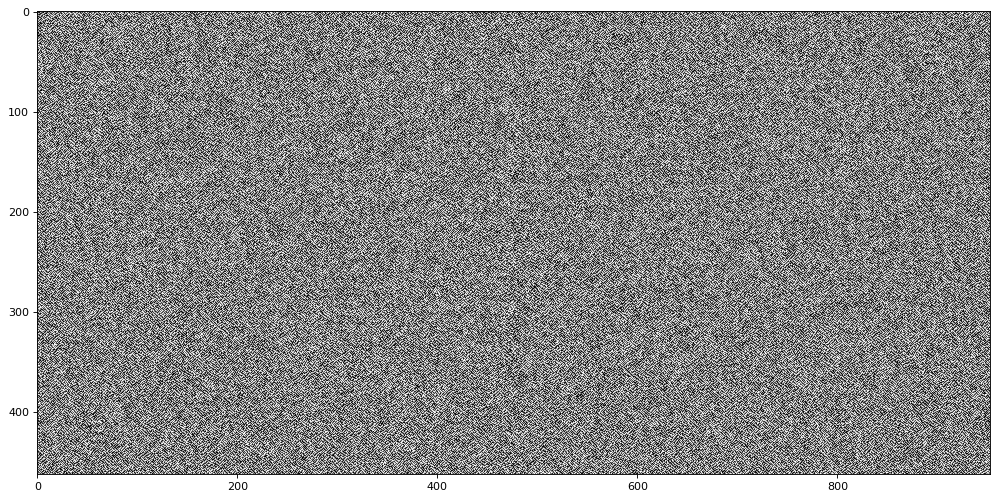

In [161]:
freq = np.fft.fftshift(np.fft.fft2(img_arr))

phases = np.angle(freq)
phases = 255 * phases / np.amax(phases)

show_2D_array_as_image(phases)